In [1]:
%load_ext autoreload
%autoreload 2
import os
from encoding_information.gpu_utils import limit_gpu_memory_growth  
limit_gpu_memory_growth()
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

from signal_utils_1D import *
from plot_utils_1D import *


/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/jax/_src/api_util.py:172: SyntaxWarning: Jitted function has static_argnums=(1,), but only accepts 1 positional arguments. This warning will be replaced by an error after 2022-08-20 at the earliest.
  warnings.warn(f"Jitted function has {argnums_name}={argnums}, "


## show space bandwidth product

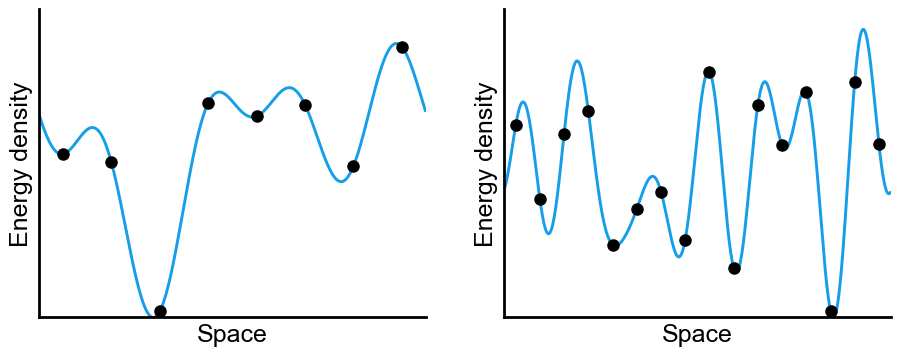

In [6]:

# plot a genrated signal and sample points
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

num_nyquist_samples = 8
signal1 = signal_from_params(generate_params_of_random_signal(num_nyquist_samples=num_nyquist_samples))
plot_in_spatial_coordinates(ax[0], signal1, show_samples=True, num_nyquist_samples=num_nyquist_samples)


num_nyquist_samples = 16
signal2 = signal_from_params(generate_params_of_random_signal(num_nyquist_samples=num_nyquist_samples))
plot_in_spatial_coordinates(ax[1], signal2, show_samples=True, num_nyquist_samples=num_nyquist_samples)

## Plot random signals in spatial and intensity coordinates

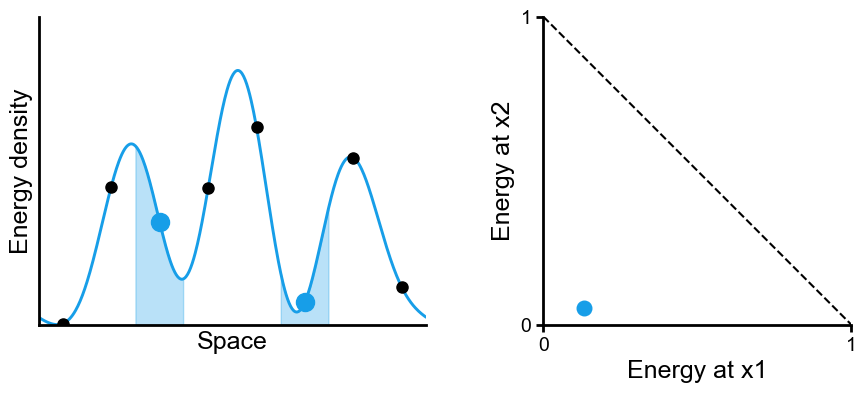

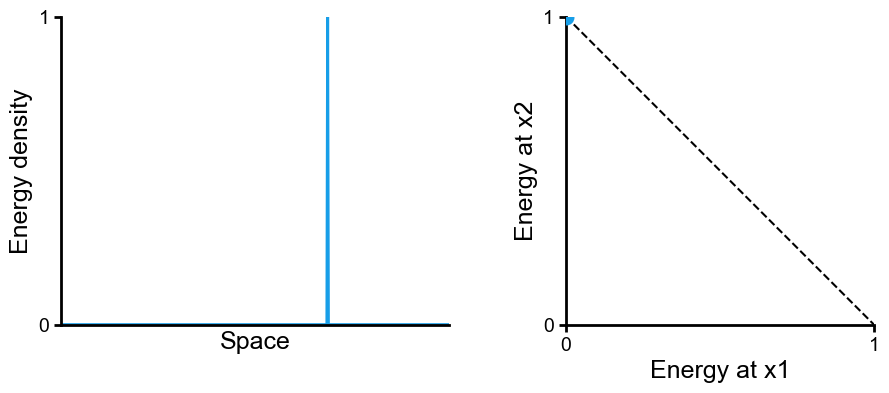

In [7]:
sampling_indices = (2, 5)

# plot a genrated signal and sample points
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

num_nyquist_samples = 8
signal = signal_from_params(generate_params_of_random_signal(num_nyquist_samples=num_nyquist_samples) )
plot_in_spatial_coordinates(ax[0], signal, show_samples=True, sampling_indices=sampling_indices, show_integration=True,
                            num_nyquist_samples=num_nyquist_samples)
plot_in_intensity_coordinates(ax[1], signal, sampling_indices=sampling_indices, num_nyquist_samples=num_nyquist_samples)


# fig, ax = plt.subplots(1, 2, figsize=(11, 4))
# signal = signal_from_params(generate_params_of_random_signal(num_nyquist_samples=num_nyquist_samples) )
# plot_in_spatial_coordinates(ax[0], signal, show_samples=True, sampling_indices=sampling_indices, show_integration=True,
#                             num_nyquist_samples=num_nyquist_samples)
# plot_in_intensity_coordinates(ax[1], signal, sampling_indices=sampling_indices, num_nyquist_samples=num_nyquist_samples)

# make a delta function
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
delta = onp.zeros(UPSAMPLED_SIGNAL_LENGTH)
delta[int(sampling_indices[1] * (UPSAMPLED_SIGNAL_LENGTH / num_nyquist_samples) + 0.5 * (UPSAMPLED_SIGNAL_LENGTH / num_nyquist_samples))] = 1
plot_in_spatial_coordinates(ax[0], delta, show_samples=False, num_nyquist_samples=num_nyquist_samples)
ax[0].set(ylim=[0, 1], yticks=[0, 1])
plot_in_intensity_coordinates(ax[1], delta, sampling_indices=sampling_indices, num_nyquist_samples=num_nyquist_samples)


## Test optimization of a signal

In [6]:
num_nyquist_samples = 8

original_signal = signal_from_params(generate_params_of_random_signal(num_nyquist_samples=num_nyquist_samples))
target_integrated_signal = onp.zeros(NUM_NYQUIST_SAMPLES)
sampling_indices = target_integrated_signal.size // 2, target_integrated_signal.size // 2 + 1
target_integrated_signal[sampling_indices[0]] = 0.5
target_integrated_signal[sampling_indices[1]] = 0.5
target_integrated_signal = np.array(target_integrated_signal)


object = generate_random_object('delta')


initial_conv_kernel = signal_from_params(generate_params_of_random_signal(num_nyquist_samples=num_nyquist_samples))
initial_signal = make_convolutional_encoder(initial_conv_kernel) @ object
optimized_kernels, output_signals = optimize_towards_target_signals([target_integrated_signal], object,
                                                                    sampling_indices=sampling_indices,
                                                                   initial_kernel=initial_conv_kernel, 
                                                                    verbose=True)
optimized_signal = output_signals[0]



  0%|          | 0/1 [00:00<?, ?it/s]

initial loss 0.29683813


100%|██████████| 1/1 [00:39<00:00, 39.24s/it]


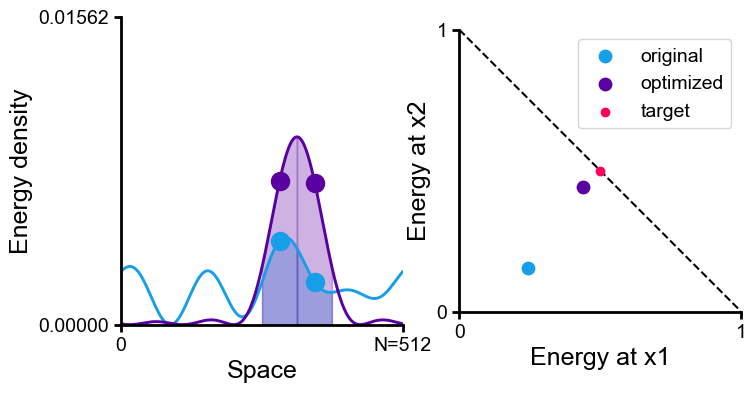

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# plot the original signal
plot_in_spatial_coordinates(ax[0], original_signal, show_samples=False, sampling_indices=sampling_indices, show_integration=True,
                            num_nyquist_samples=num_nyquist_samples)
plot_in_intensity_coordinates(ax[1], original_signal, sampling_indices=sampling_indices, num_nyquist_samples=num_nyquist_samples, label='original')


# plot the optimized signal
plot_in_spatial_coordinates(ax[0], optimized_signal, show_samples=False, sampling_indices=sampling_indices, show_integration=True,
                            num_nyquist_samples=num_nyquist_samples)
ymax = num_nyquist_samples / UPSAMPLED_SIGNAL_LENGTH
ax[0].set(ylim=[0, ymax], yticks=[0, ymax])

plot_in_intensity_coordinates(ax[1], optimized_signal, sampling_indices=sampling_indices, num_nyquist_samples=num_nyquist_samples, label='optimized')



# plot the target signal with an X
ax[1].scatter(target_integrated_signal[sampling_indices[0]], target_integrated_signal[sampling_indices[1]], label='target')
ax[1].legend()

## Optimize signals to a grid of possibilities to figure out how they can be dispersed across intensity coordinates

In [8]:
num_nyquist_samples = 2
sampling_indices = (0, 1)
grid_sample_n = 15


target_integrated_signals = make_intensity_coordinate_sampling_grid(sampling_indices, sample_n=grid_sample_n, num_nyquist_samples=num_nyquist_samples)

optimized_signals = []

object = generate_random_object('delta')
for target_integrated_signal in tqdm(target_integrated_signals):
    optimized_kernels, output_signals = optimize_towards_target_signals([target_integrated_signal], object,
                                                                    sampling_indices=sampling_indices,
                                                                   initial_kernel=initial_conv_kernel, 
                                                                    verbose=True)
    optimized_signals.extend(output_signals)
optimized_signals = np.array(optimized_signals)

  0%|          | 0/118 [00:00<?, ?it/s]

initial loss 0.62676716


  1%|          | 1/118 [00:08<17:22,  8.91s/it]

initial loss 0.59640646


  2%|▏         | 2/118 [00:44<48:04, 24.86s/it]

initial loss 0.5762499


  3%|▎         | 3/118 [01:20<57:24, 29.95s/it]

initial loss 0.56629735


  3%|▎         | 4/118 [01:50<56:35, 29.78s/it]

initial loss 0.56654894


  4%|▍         | 5/118 [02:08<48:20, 25.67s/it]

initial loss 0.57700455


  5%|▌         | 6/118 [02:27<43:23, 23.24s/it]

initial loss 0.5976643


  6%|▌         | 7/118 [02:39<36:28, 19.71s/it]

initial loss 0.6285281


  7%|▋         | 8/118 [02:53<32:22, 17.66s/it]

initial loss 0.669596


  8%|▊         | 9/118 [03:06<29:29, 16.24s/it]

initial loss 0.720868


  8%|▊         | 10/118 [03:16<26:09, 14.53s/it]

initial loss 0.78234404


  9%|▉         | 11/118 [03:29<24:59, 14.01s/it]

initial loss 0.85402423


 10%|█         | 12/118 [03:42<24:00, 13.59s/it]

initial loss 0.93590844


 11%|█         | 13/118 [03:52<22:07, 12.64s/it]

initial loss 1.0279968


 12%|█▏        | 14/118 [04:01<20:02, 11.57s/it]

initial loss 1.1302891


 13%|█▎        | 15/118 [04:13<20:01, 11.67s/it]

initial loss 0.52447474


 14%|█▎        | 16/118 [04:44<29:32, 17.37s/it]

initial loss 0.49411407


 14%|█▍        | 17/118 [05:03<30:00, 17.83s/it]

initial loss 0.47395748


 15%|█▌        | 18/118 [05:22<30:25, 18.25s/it]

initial loss 0.46400493


 16%|█▌        | 19/118 [05:41<30:38, 18.57s/it]

initial loss 0.46425653


 17%|█▋        | 20/118 [06:06<33:27, 20.49s/it]

initial loss 0.47471216


 18%|█▊        | 21/118 [06:30<34:48, 21.53s/it]

initial loss 0.4953719


 19%|█▊        | 22/118 [06:54<35:38, 22.27s/it]

initial loss 0.5262357


 19%|█▉        | 23/118 [07:13<33:25, 21.11s/it]

initial loss 0.5673036


 20%|██        | 24/118 [07:25<28:58, 18.50s/it]

initial loss 0.6185756


 21%|██        | 25/118 [07:37<25:48, 16.65s/it]

initial loss 0.6800516


 22%|██▏       | 26/118 [07:50<23:29, 15.33s/it]

initial loss 0.7517318


 23%|██▎       | 27/118 [08:01<21:36, 14.25s/it]

initial loss 0.833616


 24%|██▎       | 28/118 [08:11<19:06, 12.74s/it]

initial loss 0.92570436


 25%|██▍       | 29/118 [08:20<17:29, 11.79s/it]

initial loss 0.4323865


 25%|██▌       | 30/118 [08:50<25:21, 17.29s/it]

initial loss 0.40202582


 26%|██▋       | 31/118 [09:03<22:51, 15.76s/it]

initial loss 0.38186923


 27%|██▋       | 32/118 [09:15<21:09, 14.77s/it]

initial loss 0.37191668


 28%|██▊       | 33/118 [09:28<20:05, 14.18s/it]

initial loss 0.37216827


 29%|██▉       | 34/118 [09:41<19:16, 13.77s/it]

initial loss 0.3826239


 30%|██▉       | 35/118 [09:53<18:28, 13.35s/it]

initial loss 0.40328366


 31%|███       | 36/118 [10:05<17:50, 13.05s/it]

initial loss 0.43414745


 31%|███▏      | 37/118 [10:18<17:18, 12.83s/it]

initial loss 0.47521538


 32%|███▏      | 38/118 [10:30<16:53, 12.67s/it]

initial loss 0.52648735


 33%|███▎      | 39/118 [10:48<18:52, 14.33s/it]

initial loss 0.5879634


 34%|███▍      | 40/118 [11:07<20:13, 15.56s/it]

initial loss 0.65964353


 35%|███▍      | 41/118 [11:19<18:48, 14.66s/it]

initial loss 0.35050225


 36%|███▌      | 42/118 [11:44<22:18, 17.61s/it]

initial loss 0.32014158


 36%|███▋      | 43/118 [12:02<22:20, 17.88s/it]

initial loss 0.299985


 37%|███▋      | 44/118 [12:15<20:03, 16.26s/it]

initial loss 0.29003245


 38%|███▊      | 45/118 [12:27<18:21, 15.09s/it]

initial loss 0.29028404


 39%|███▉      | 46/118 [12:39<16:51, 14.05s/it]

initial loss 0.30073968


 40%|███▉      | 47/118 [12:50<15:49, 13.37s/it]

initial loss 0.32139942


 41%|████      | 48/118 [13:02<14:49, 12.71s/it]

initial loss 0.3522632


 42%|████▏     | 49/118 [13:13<14:02, 12.21s/it]

initial loss 0.3933311


 42%|████▏     | 50/118 [13:24<13:33, 11.96s/it]

initial loss 0.44460312


 43%|████▎     | 51/118 [13:36<13:21, 11.96s/it]

initial loss 0.50607914


 44%|████▍     | 52/118 [13:53<14:44, 13.39s/it]

initial loss 0.5777593


 45%|████▍     | 53/118 [14:11<15:57, 14.73s/it]

initial loss 0.27882212


 46%|████▌     | 54/118 [14:37<19:29, 18.27s/it]

initial loss 0.24846143


 47%|████▋     | 55/118 [15:01<20:55, 19.93s/it]

initial loss 0.22830483


 47%|████▋     | 56/118 [15:13<18:13, 17.64s/it]

initial loss 0.21835232


 48%|████▊     | 57/118 [15:26<16:30, 16.24s/it]

initial loss 0.21860388


100%|██████████| 1/1 [00:15<00:00, 15.34s/it]


 49%|████▉     | 58/118 [15:42<15:58, 15.98s/it]

initial loss 0.22905953


 50%|█████     | 59/118 [15:55<15:00, 15.26s/it]

initial loss 0.24971926


 51%|█████     | 60/118 [16:08<14:11, 14.69s/it]

initial loss 0.28058308


 52%|█████▏    | 61/118 [16:21<13:24, 14.12s/it]

initial loss 0.32165098


 53%|█████▎    | 62/118 [16:34<12:45, 13.67s/it]

initial loss 0.37292296


 53%|█████▎    | 63/118 [16:43<11:18, 12.33s/it]

initial loss 0.434399


 54%|█████▍    | 64/118 [16:55<11:04, 12.30s/it]

initial loss 0.21734607


 55%|█████▌    | 65/118 [17:13<12:22, 14.00s/it]

initial loss 0.18698537


 56%|█████▌    | 66/118 [17:37<14:38, 16.90s/it]

initial loss 0.16682878


 57%|█████▋    | 67/118 [17:49<13:10, 15.50s/it]

initial loss 0.15687627


 58%|█████▊    | 68/118 [17:59<11:35, 13.92s/it]

initial loss 0.15712783


 58%|█████▊    | 69/118 [18:09<10:14, 12.55s/it]

initial loss 0.16758348


 59%|█████▉    | 70/118 [18:17<09:06, 11.38s/it]

initial loss 0.18824321


 60%|██████    | 71/118 [18:25<08:06, 10.36s/it]

initial loss 0.21910702


 61%|██████    | 72/118 [18:33<07:24,  9.66s/it]

initial loss 0.26017493


 62%|██████▏   | 73/118 [18:42<06:56,  9.25s/it]

initial loss 0.3114469


 63%|██████▎   | 74/118 [18:50<06:37,  9.03s/it]

initial loss 0.16607407


 64%|██████▎   | 75/118 [19:03<07:19, 10.22s/it]

initial loss 0.1357134


 64%|██████▍   | 76/118 [19:38<12:20, 17.63s/it]

initial loss 0.11555679


 65%|██████▌   | 77/118 [19:56<12:05, 17.69s/it]

initial loss 0.105604276


 66%|██████▌   | 78/118 [20:12<11:31, 17.28s/it]

initial loss 0.105855845


 67%|██████▋   | 79/118 [20:25<10:24, 16.01s/it]

initial loss 0.11631149


100%|██████████| 1/1 [00:11<00:00, 11.90s/it]


 68%|██████▊   | 80/118 [20:37<09:21, 14.78s/it]

initial loss 0.13697122


 69%|██████▊   | 81/118 [20:49<08:34, 13.91s/it]

initial loss 0.16783503


 69%|██████▉   | 82/118 [20:58<07:28, 12.47s/it]

initial loss 0.20890294


 70%|███████   | 83/118 [21:06<06:29, 11.14s/it]

initial loss 0.1250062


 71%|███████   | 84/118 [21:18<06:27, 11.40s/it]

initial loss 0.09464552


 72%|███████▏  | 85/118 [21:36<07:21, 13.39s/it]

initial loss 0.07448892


 73%|███████▎  | 86/118 [21:48<06:56, 13.01s/it]

initial loss 0.06453641


 74%|███████▎  | 87/118 [21:59<06:19, 12.23s/it]

initial loss 0.06478798


 75%|███████▍  | 88/118 [22:08<05:36, 11.22s/it]

initial loss 0.07524362


 75%|███████▌  | 89/118 [22:16<04:58, 10.29s/it]

initial loss 0.09590335


 76%|███████▋  | 90/118 [22:24<04:29,  9.64s/it]

initial loss 0.12676716


 77%|███████▋  | 91/118 [22:32<04:08,  9.19s/it]

initial loss 0.09414239


 78%|███████▊  | 92/118 [22:43<04:10,  9.64s/it]

initial loss 0.06378171


 79%|███████▉  | 93/118 [22:55<04:19, 10.39s/it]

initial loss 0.04362511


 80%|███████▉  | 94/118 [23:07<04:22, 10.92s/it]

initial loss 0.03367259


 81%|████████  | 95/118 [23:18<04:09, 10.85s/it]

initial loss 0.033924155


 81%|████████▏ | 96/118 [23:27<03:45, 10.25s/it]

initial loss 0.0443798


 82%|████████▏ | 97/118 [23:35<03:22,  9.63s/it]

initial loss 0.06503954


 83%|████████▎ | 98/118 [23:43<03:03,  9.15s/it]

initial loss 0.073482655


 84%|████████▍ | 99/118 [23:53<02:58,  9.39s/it]

initial loss 0.04312197


 85%|████████▍ | 100/118 [24:05<03:04, 10.23s/it]

initial loss 0.022965375


 86%|████████▌ | 101/118 [24:23<03:35, 12.67s/it]

initial loss 0.013012858


 86%|████████▋ | 102/118 [24:35<03:19, 12.49s/it]

initial loss 0.013264423


 87%|████████▋ | 103/118 [24:44<02:51, 11.40s/it]

initial loss 0.02372007


 88%|████████▊ | 104/118 [24:53<02:26, 10.48s/it]

initial loss 0.06302702


 89%|████████▉ | 105/118 [25:05<02:22, 10.97s/it]

initial loss 0.032666337


 90%|████████▉ | 106/118 [25:16<02:13, 11.09s/it]

initial loss 0.012509739


 91%|█████████ | 107/118 [25:34<02:24, 13.14s/it]

initial loss 0.0025572209


 92%|█████████▏| 108/118 [25:46<02:08, 12.84s/it]

initial loss 0.0028087865


 92%|█████████▏| 109/118 [25:55<01:45, 11.69s/it]

initial loss 0.062775455


 93%|█████████▎| 110/118 [26:05<01:28, 11.11s/it]

initial loss 0.032414775


 94%|█████████▍| 111/118 [26:15<01:15, 10.78s/it]

initial loss 0.012258178


 95%|█████████▍| 112/118 [26:27<01:07, 11.20s/it]

initial loss 0.0023056595


 96%|█████████▌| 113/118 [26:39<00:57, 11.40s/it]

initial loss 0.072727986


 97%|█████████▋| 114/118 [26:48<00:42, 10.61s/it]

initial loss 0.042367302


 97%|█████████▋| 115/118 [26:57<00:30, 10.33s/it]

initial loss 0.092884585


 98%|█████████▊| 116/118 [27:06<00:19,  9.77s/it]

initial loss 0.0625239


 99%|█████████▉| 117/118 [27:16<00:09,  9.75s/it]

initial loss 0.12324525


100%|██████████| 118/118 [27:24<00:00, 13.94s/it]

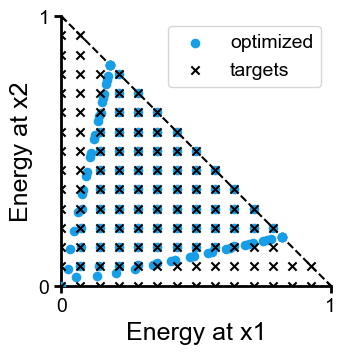

In [16]:
# make plots
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))
# plot_in_intensity_coordinates(ax, original_signal, label='initialization')
plot_in_intensity_coordinates(ax, optimized_signals, label='optimized', sampling_indices=sampling_indices, num_nyquist_samples=num_nyquist_samples)
plot_in_intensity_coordinates(ax, target_integrated_signals, marker='x', label='targets', color='k', sampling_indices=sampling_indices, integrate=False, num_nyquist_samples=num_nyquist_samples)
ax.legend()
fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + 'optmized_bandlimited_signals' + '.pdf', transparent=True)
